In [39]:
import datetime
print(f"the last edit: {datetime.datetime.now()}")

the last edit: 2025-08-04 09:48:24.326705


In [40]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.18.0


In [41]:
!nvidia-smi

Mon Aug  4 09:48:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             36W /   70W |    1144MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [42]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2025-08-04 09:48:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-08-04 09:48:24 (87.9 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [43]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [44]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2025-08-04 09:48:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 74.125.24.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  22.1MB/s    in 8.3s    

2025-08-04 09:48:33 (19.3 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [45]:
# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [46]:
# Creating training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

# 📚 Difference between `image_dataset_from_directory` vs `ImageDataGenerator` in TensorFlow

---

## ✅ 1. Purpose and API Style

| Feature | `image_dataset_from_directory` | `ImageDataGenerator` |
|--------|-------------------------------|----------------------|
| **Introduced in** | TensorFlow 2.x (modern API) | TensorFlow 1.x (legacy API, still usable) |
| **Main usage** | Creates `tf.data.Dataset` objects | Generates batches of images using a Python generator |
| **Recommended for** | TF 2.x workflows, including tf.data pipelines | Legacy code, quick prototyping, or Keras 1.x/2.x projects |

---

## ✅ 2. Output Type

| Feature | `image_dataset_from_directory` | `ImageDataGenerator` |
|--------|-------------------------------|----------------------|
| **Returns** | `tf.data.Dataset` (eager execution, parallelizable, efficient) | Python iterator / generator |
| **Supports `.map()`, `.batch()`, `.prefetch()`** | ✅ Yes | ❌ No |
| **TensorFlow Dataset API compatible** | ✅ Yes | ❌ No (unless wrapped manually) |

---

## ✅ 3. Data Loading and Preprocessing

| Feature | `image_dataset_from_directory` | `ImageDataGenerator` |
|--------|-------------------------------|----------------------|
| **Loads all file paths into memory initially** | ✅ Yes (uses filenames then loads during iteration) | ✅ Yes |
| **Augmentation** | ❌ No built-in augmentation | ✅ Yes, supports real-time augmentation |
| **Preprocessing** | Basic: resizing, shuffling, batching | Advanced: rescaling, rotation, zoom, flips, etc. |

---

## ✅ 4. Augmentation

| Feature | `image_dataset_from_directory` | `ImageDataGenerator` |
|--------|-------------------------------|----------------------|
| **Built-in augmentation** | ❌ No | ✅ Yes (`rotation_range`, `zoom_range`, etc.) |
| **Custom augmentation** | ✅ Use `.map()` with `tf.image` functions | ⚠️ Limited to Keras-style transformations |

---

## ✅ 5. Example Use

### 🟢 `image_dataset_from_directory`
```python
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "path/to/data",
    image_size=(224, 224),
    batch_size=32
)




```
### 🟠 Example: `ImageDataGenerator` with Augmentation

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    "path/to/data",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


```
## ✅ 6. Performance and Scalability

| Feature | `image_dataset_from_directory` | `ImageDataGenerator` |
|--------|-------------------------------|----------------------|
| **Efficient for large datasets** | ✅ Yes (uses `tf.data`) | ❌ Less efficient |
| **GPU pipelining support** | ✅ Better (with `.prefetch()`) | ⚠️ Limited |
| **Recommended for production** | ✅ Yes | ⚠️ Not ideal |
| **Parallel data loading** | ✅ Uses `num_parallel_calls` | ❌ Not supported |
| **Shuffling** | ✅ Built-in with `shuffle=True` | ✅ Supported |
| **Caching** | ✅ With `.cache()` | ❌ Not supported |
| **Customization** | ✅ Easily extensible with `.map()` | ⚠️ Limited to predefined options |

---

## ✅ Summary Table

| Feature | `image_dataset_from_directory` | `ImageDataGenerator` |
|--------|-------------------------------|----------------------|
| **Output Type** | `tf.data.Dataset` | Python generator |
| **Augmentation** | ❌ No (but can use `.map()` + `tf.image`) | ✅ Built-in |
| **Performance** | ✅ High (uses efficient pipelines) | ⚠️ Lower |
| **TF 2.x Support** | ✅ Fully integrated | ⚠️ Legacy support |
| **Custom Preprocessing** | ✅ With `.map()` | ⚠️ Limited |
| **Data Pipeline Control** | ✅ Full control via `tf.data` | ❌ Not flexible |
| **Best Use Case** | Modern production training | Quick prototyping or legacy code |





In [47]:
# Create data inputs
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [48]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [49]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [50]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[173.45169    179.45169    205.45169   ]
   [169.4351     175.4351     201.4351    ]
   [164.30309    170.30309    196.30309   ]
   ...
   [119.83117    120.83117    141.83118   ]
   [120.644936   121.644936   142.64493   ]
   [121.28062    122.28062    143.28062   ]]

  [[171.2747     177.2747     203.2747    ]
   [168.51068    174.51068    200.51068   ]
   [166.8766     172.8766     198.8766    ]
   ...
   [118.69266    119.69266    140.69266   ]
   [120.36384    121.36384    142.36385   ]
   [120.72737    121.72737    142.72737   ]]

  [[169.63712    175.63712    201.63712   ]
   [170.93973    176.93973    202.93973   ]
   [168.76132    174.76132    200.33275   ]
   ...
   [116.654274   117.654274   138.65427   ]
   [124.14145    125.14145    146.14145   ]
   [122.55837    123.55837    144.55838   ]]

  ...

  [[200.95978    210.95978    237.95978   ]
   [200.97989    210.97989    237.97989   ]
   [200.79434    210.79434    235.79434   ]
   ...
   [ 84.40174     77.401

### Model 0: Building a transfer learning model using the Keras Functional API

In [51]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# 2. freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

# 4. if using Resnet50V2, add this to speed up convergence, remove for EfficientNetV2
# x = tf.keras.layer.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to thr base_model (note: using tf.keras.applications), EfficientnetV2 don't have to be normalized
x = base_model(inputs)

# 6. Averagw pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data_10_percent)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20250804-094837
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 818ms/step - accuracy: 0.2661 - loss: 2.0734 - val_accuracy: 0.7122 - val_loss: 1.3490
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.7308 - loss: 1.2551 - val_accuracy: 0.7944 - val_loss: 0.9285
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.8210 - loss: 0.8664 - val_accuracy: 0.8339 - val_loss: 0.7653
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.8645 - loss: 0.7185 - val_accuracy: 0.8405 - val_loss: 0.6627
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.8692 - loss: 0.6209 - val_accuracy: 0.8388 - val_loss: 0.6182


In [52]:
model_0.evaluate(test_data_10_percent)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.8500 - loss: 0.5834


[0.5716582536697388, 0.8587999939918518]

In [53]:
len(test_data_10_percent)

79

In [54]:
# check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_layer_10
1 rescaling_7
2 normalization_7
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_co

In [55]:
model_0.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

In [56]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_7         │ (None, None,      │          0 │ input_layer_10[0… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_7     │ (None, None,      │          0 │ rescaling_7[0][0] │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ normalization_7[… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │      4,608 │ stem_activation[… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, None,      │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, None,      │          0 │ block1a_project_… │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, None,      │      9,216 │ block1a_project_… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, None,      │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, None,      │          0 │ block2a_expand_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, None,      │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, None,      │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, None,      │     36,864 │ block2a_project_… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, None,      │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, None,      │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

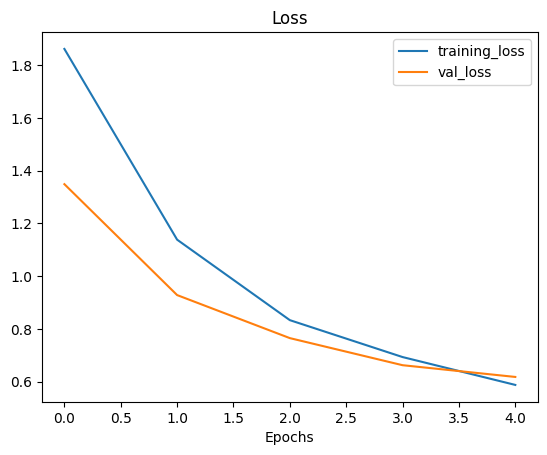

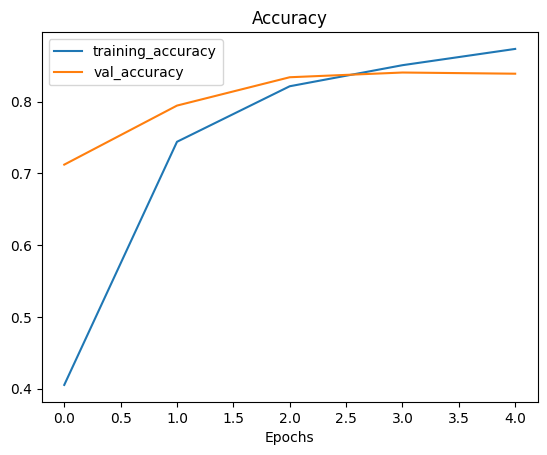

In [57]:
plot_loss_curves(history_10_percent)

## **Getting a feature vector from a trained model**

In [58]:
# Define input tensor shape (same number of dimensions as the output of efficientnetv2-bo)
input_shape = (1,4,4,3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")


# Pass the random tensor through a global average pooling 2D layer
global_average_pool_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pool_tensor}\n")


# check the shapes of the different tensors
print(f"shape of input tensor: {input_tensor.shape}")
print(f"shape of 2D global average pool input tensor: {global_average_pool_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

shape of input tensor: (1, 4, 4, 3)
shape of 2D global average pool input tensor: (1, 3)


In [59]:
input_shape1 = (1,4,4,3)

tf.random.set_seed(42)

input_tensor1 = tf.random.normal(input_shape1)

print(f"Random input tensor:\n {input_tensor}\n")

global_max_pooled_tensor = tf.keras.layers.GlobalMaxPooling2D()(input_tensor1)

print(f"2D global average pooled random tensor:\n {global_max_pooled_tensor}")

print(f"shape of input tensor: {input_tensor1.shape}")
print(f"shape of 2D global average pooled input tensor: {global_max_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[0.9058464 1.1603122 1.6994323]]
shape of input tensor: (1, 4, 4, 3)
shape of 2D global average pooled input tensor: (1, 3)


In [60]:
# This is the same as GlobalAveragePooling2D()

tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

## **Running a series of transfer learning experiments**

We've seen the incredible results of transfer learning on 10% of the training data, what about 1% of the training data?

What kind of results do you think we can get using 100x less data than the original CNN models we built ourselves?

Why don't we answer that question while running the following modelling experiments:
1. **Model 1**: Use feature extraction transfer learning on 1% of the training data with data augmentation.
2. **Model 2**: Use feature extraction transfer learning on 10% of the training data with data augmentation and save the results to a checkpoint.
3. **Model 3**: Fine-tune the **Model 2** checkpoint on 10% of the training data with data augmentation.
4. **Model 4**: Fine-tune the **Model 2** checkpoint on 100% of the training data with data augmentation.

While all of the experiments will be run on different versions of the training data, they will all be evaluated on the **same test dataset**, this ensures the results of each experiment are as comparable as possible.

All experiments will be done using the `EfficientNetV2B0` model within the `tf.keras.applications.efficientnet_v2` module.

To make sure we're keeping track of our experiments, we'll use our `create_tensorboard_callback()` function to log all of the model training logs.

We'll construct each model using the Keras Functional API and instead of implementing data augmentation in the `ImageDataGenerator` class as we have previously, we're going to build it right into the model using the [`tf.keras.layers`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/) module.

Let's begin by downloading the data for experiment 1, using feature extraction transfer learning on 1% of the training data with data augmentation.

In [61]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2025-08-04 09:50:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 172.217.194.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M  22.4MB/s    in 6.9s    

2025-08-04 09:50:14 (18.5 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [62]:
IMG_SIZE =(224,224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode = "categorical",
                                                                           batch_size=32,
                                                                           image_size = IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size = IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [66]:
tf.keras.backend.clear_session()

In [67]:
from tensorflow import keras
from tensorflow.keras import layers


data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomHeight(0.1),
    layers.RandomWidth(0.1),
], name = "data_augmentation")

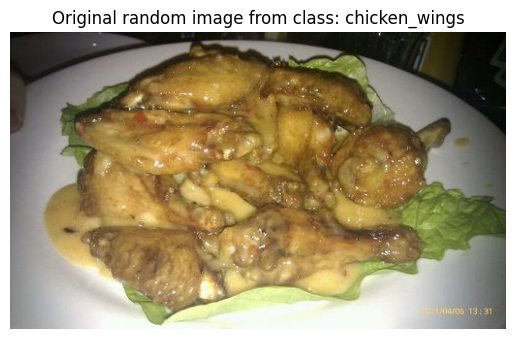

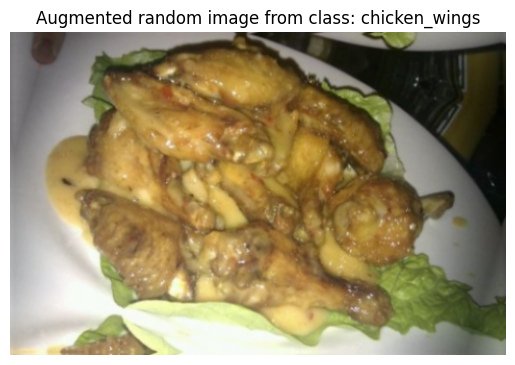

In [68]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" +target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

## **Model 1: Feature extraction transfer learning on 1% of the data with data augmentation**

> **All Thanks to Claude sonnet4 🫡🫡🫡🫡**

In [69]:
# Clear any existing models and variables
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session()

# Define image size
IMG_SIZE = (224, 224)
input_shape = (224, 224, 3)

# Load datasets
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1_percent,
    label_mode="categorical",
    batch_size=32,
    image_size=IMG_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    image_size=IMG_SIZE
)

# Create data augmentation layer
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomHeight(0.1),
    layers.RandomWidth(0.1),
], name="data_augmentation")

# Create base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    input_shape=input_shape,
    weights='imagenet'
)
base_model.trainable = False

# Build the model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Print model summary to verify
model_1.summary()

# Train the model
history_1_percent = model_1.fit(
    train_data_1_percent,
    epochs=5,
    steps_per_epoch=len(train_data_1_percent),
    validation_data=test_data,
    validation_steps=len(test_data),  # Use all validation data
    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")]
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,932,122 (22.63 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20250804-095528
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 32s 8s/step - accuracy: 0.1118 - loss: 2.3590 - val_accuracy: 0.2304 - val_loss: 2.1560
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.2204 - loss: 2.1474 - val_accuracy: 0.3260 - val_loss: 2.0360
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.4480 - loss: 1.9600 - val_accuracy: 0.4128 - val_loss: 1.9275
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.4954 - loss: 1.8040 - val_accuracy: 0.4548 - val_loss: 1.8343
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.5748 - loss: 1.6938 - val_accuracy: 0.4932 - val_loss: 1.7495
